In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_poisson import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

In [2]:
kernel_list = [gram_Matrix, k_uu, k_uf, k_fu, k_ff]
hyperparameters = ["l_x", "sigma_f"]
model = PhysicsInformedGP_regressor(kernel_list,timedependence=True, params = hyperparameters)
model.set_name_kernel("poisson")
n_training_points, noise_sq = 20, [1e-10,1e-10]
model.set_training_data("poisson_data.csv",n_training_points, noise_sq)
model.set_validation_data(1000)
#model.plot_raw_data()

 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:943: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:955: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:988: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:1000: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


In [3]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-1.3,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((2))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))  #lx
    theta_initial[1] = rng.uniform(0, 1, 1)               #sigma_f              
    return theta_initial
n_restarts = 200
n_threads = -1
opt_params_dict = {'theta_initial': get_initial_values,   #needed for all optimization methods
                    'bounds': ((1e-2, None), (1e-5, None)), #needed for TNC and L-BFGS-B
                    'gtol': 1e-6}
model.train("Nelder-Mead",n_restarts, n_threads,opt_params_dict)
#model.train("TNC",n_restarts, n_threads,opt_params_dict)

100%|██████████| 200/200 [00:06<00:00, 33.22it/s]


Theta:  [0.45356364 0.30912555] 
 Log marginal likelihood:  -8.311849594116211


In [4]:
theta = np.array([4.479e-01,  2.881e-01]) #-8.393392562866211
model.set_params(theta)

In [5]:
n_test_points = 100
x_star, t_star = np.meshgrid(np.linspace(0, 1, n_test_points), np.linspace(0, 1, n_test_points))
X_star = np.hstack((x_star.reshape(-1, 1), t_star.reshape(-1, 1)))
model.predict_model(X_star)

No handles with labels found to put in legend.


-----------------------------------------------
GP with kernel: 
Training data: (20, 2)
Training targets: (40, 1)
Hyperparameters: {'l_x': 0.4479, 'sigma_f': 0.2881}
Log marginal likelihood: -8.311849594116211
Mean squared error: {'u': 1.2008287058051792e-06, 'f': 0.0036161753814667463}
Relative l2 error: {'u': 0.010923591390344593, 'f': 0.012147198677062999}
-----------------------------------------------



 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:677: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:686: RuntimeWarning:invalid value encountered in sqrt


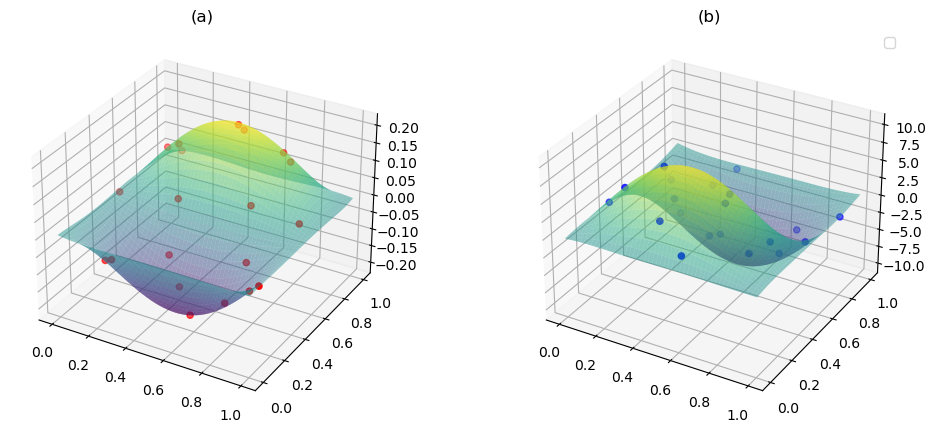

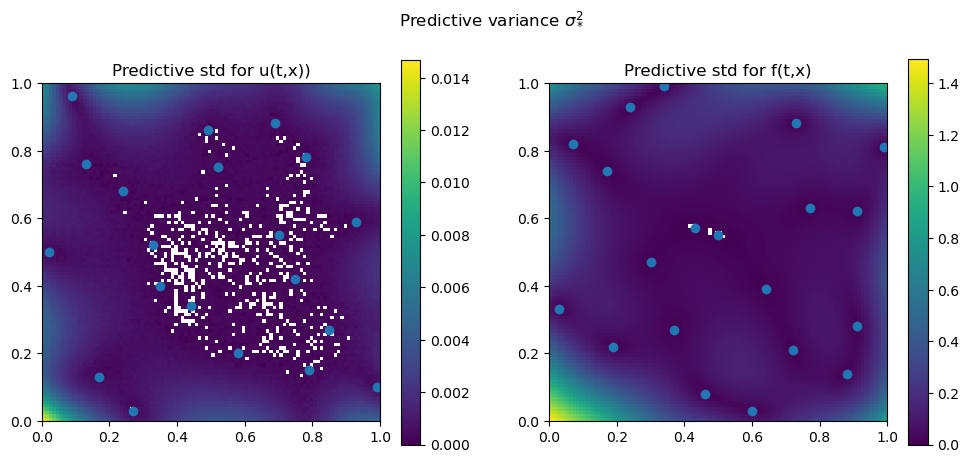

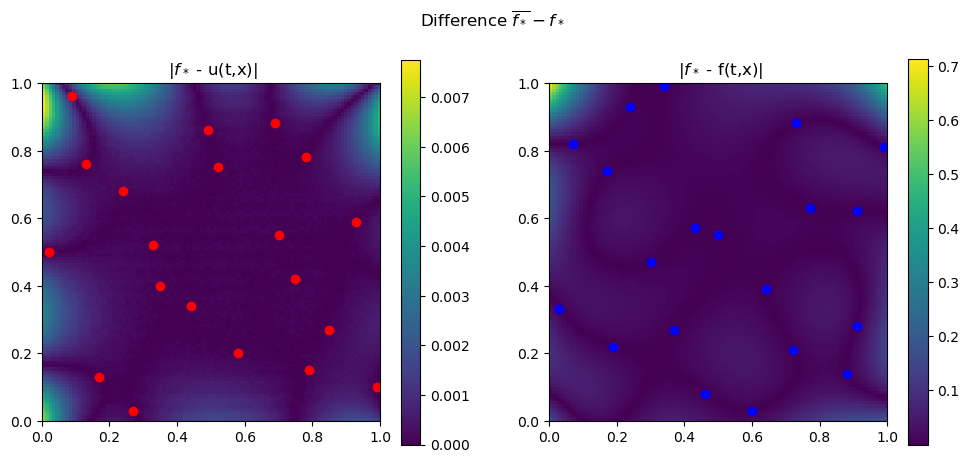

In [6]:
model.plot_prediction(X_star, "","predictive_mean.png")
model.error()
print(model)
model.plot_variance(X_star, "Predictive variance $\\sigma_*^2$", "predictive_variance.png")
model.plot_difference( "Difference $\\overline{ f_*} - f_*$", "difference.png")

In [7]:
#model.use_GPy(X_star,"gpy")
#model.plot_difference_GPy("difference GPy ", "GPy_difference.png")
#model.plot_variance_GPy("predictive variance GPy ", "GPy_variance.png")

In [8]:
#model.set_axis_labels("x","t")
#model.plot_merged_2d_plots(X_star,"merged_2d_plots.png",figsize=(10,11))


In [9]:
#model.plot_GPYmeandiff(X_star,"GPy_mean_diff.png",figsize=(10,9))

 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:1275: RuntimeWarning:invalid value encountered in sqrt
 /Users/tobileitgeb/Code/Code_bac/final_examples/poisson/../../PI_GP_regressor/main_class.py:1276: RuntimeWarning:invalid value encountered in sqrt


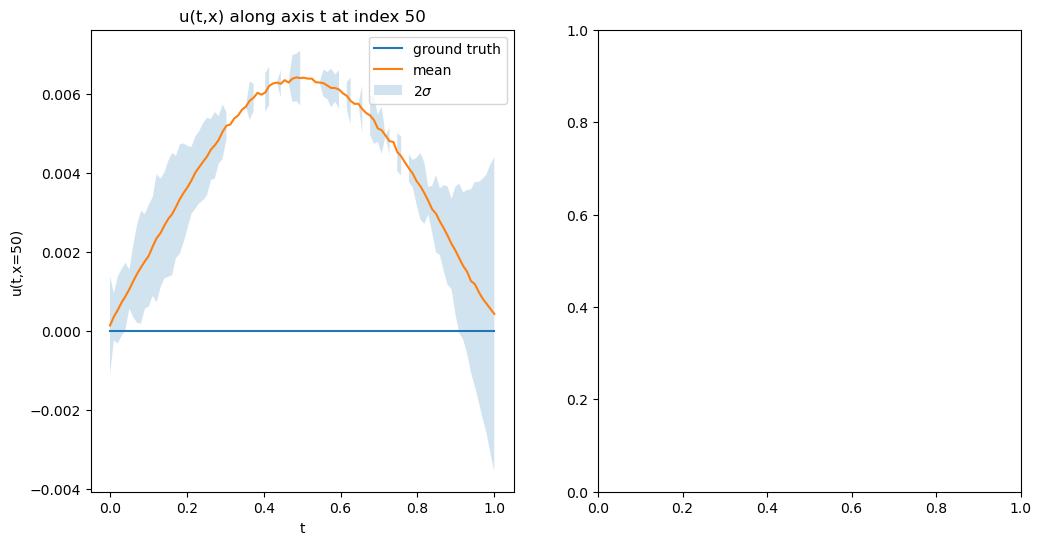

In [10]:
model.plot_1d_cut([0,50],"")

In [11]:
model.plot_1d_bokeh([0,50],"","")

Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



TypeError: Object of type ArrayImpl is not JSON serializable